# Javier Alejandro Mazariegos Godoy

# Contours Tutorial

## Summary
- Extract contours
- Draw contours
- Contour features

## Extract contours

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import cvlib
import pandas as pd
PATH = '/Users/cmedina/Documents/cm/ufm/cv/cv/clases_diarias/im/'

im = cv.imread('leaf.png')

assert im is not None, "file could not be read, check with os.path.exists()"

imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)
# fixed Th
ret, imgbin = cv.threshold(imgray, 120, 255, cv.THRESH_BINARY)


(217, 288)


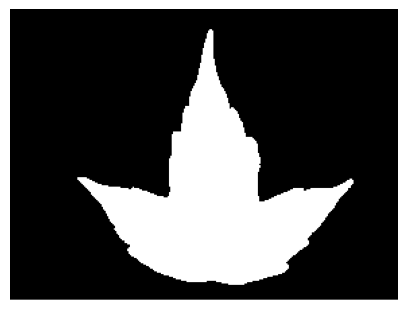

In [12]:
def view(img, title=None):
    k = 5
    fig,ax1 = plt.subplots(figsize=(k,k))
    if len(img.shape)==2:
        ax1.imshow(img, vmin=0, vmax=255, cmap='gray')
    else:
        ax1.imshow(img)   

    if(title != None):
        ax1.set_title(title)
    plt.axis('off')
    plt.show()
view(imgbin)

In [13]:
# compute contours
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(imgbin, mode, method[1])

In [14]:
print(f'Type: {type(contours)}')
print(f'Elements: {len(contours):,}')
contours

Type: <class 'tuple'>
Elements: 2


(array([[[  0, 216]],
 
        [[287, 216]]], dtype=int32),
 array([[[148,  15]],
 
        [[147,  16]],
 
        [[147,  17]],
 
        [[146,  18]],
 
        [[146,  21]],
 
        [[145,  22]],
 
        [[145,  24]],
 
        [[144,  25]],
 
        [[144,  28]],
 
        [[143,  29]],
 
        [[143,  33]],
 
        [[142,  34]],
 
        [[142,  39]],
 
        [[141,  40]],
 
        [[141,  43]],
 
        [[140,  44]],
 
        [[140,  48]],
 
        [[139,  49]],
 
        [[139,  52]],
 
        [[138,  53]],
 
        [[138,  54]],
 
        [[137,  55]],
 
        [[137,  56]],
 
        [[136,  57]],
 
        [[136,  58]],
 
        [[135,  59]],
 
        [[135,  60]],
 
        [[134,  61]],
 
        [[134,  64]],
 
        [[133,  65]],
 
        [[133,  71]],
 
        [[132,  72]],
 
        [[130,  72]],
 
        [[130,  73]],
 
        [[129,  74]],
 
        [[129,  76]],
 
        [[128,  77]],
 
        [[128,  84]],
 
        [[127,  85]],
 
   

## Drawing Contours

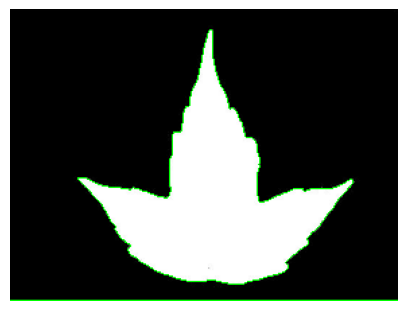

In [15]:
# draw contours over image
index = -1
color = (0,255,0) #(r,g,b)  #Esto es el color
thickness = 1               #Esto es el grosor
imgcont = cv.drawContours(im.copy(), contours, index, color, thickness)
view(imgcont)

## Contour Features

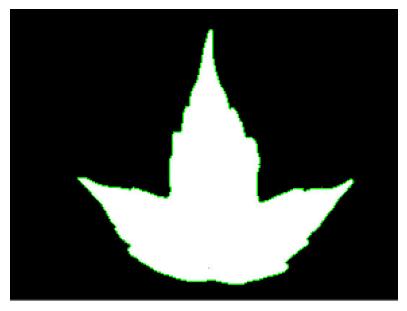

In [16]:
# draw contours over image
index = 1
color = (0,255,0) #(r,g,b)
thickness = 1
imgcont = cv.drawContours(im.copy(), contours, index, color, thickness)
view(imgcont)
cnt = contours[index]

## Centroide

In [17]:
M = cv.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx,cy)

151 142


# Area

In [18]:
contours_area = cv.contourArea(cnt)
print(contours_area)

13700.5


# Perimeter

In [19]:
perimeter = cv.arcLength(cnt,True) # second argument if the contour is a closed loop
                                    # Decimos que es una figura cerrada.
print(perimeter)

746.6833273172379


# Contour approximation

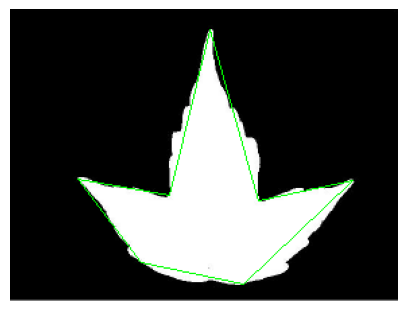

In [20]:
#Esto se puede aplicar cuando se quiere obviar cierto detalles.

percent =0.02  #Porcentaje que se quiere simplificar del largo del contorno. 
                # Reduzca en tanto porciento la longitud del largo.
epsilon = percent*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)
imgcont = cv.drawContours(im.copy(), [approx], -1, color, thickness)
view(imgcont)

# Convex Hull

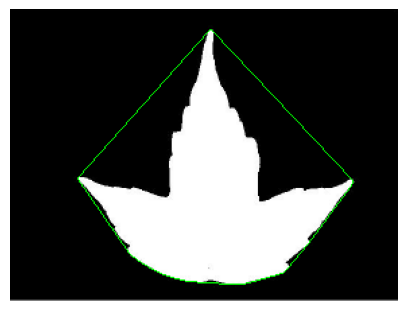

In [21]:
# Esto lo que hace es cuál es la figura o poligono minimo que encierra mi objeto.
hull = cv.convexHull(cnt)
imgcont = cv.drawContours(im.copy(), [hull], -1, color, thickness)
view(imgcont)

# Bounding Rectangle

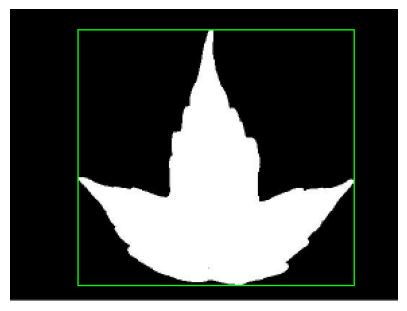

In [22]:
# El rectangulo que contiene nustro contorno.
x,y,w,h = cv.boundingRect(cnt)
view(cv.rectangle(im.copy(),(x,y),(x+w,y+h),(0,255,0),1))

# Minimum area bounding rectangle

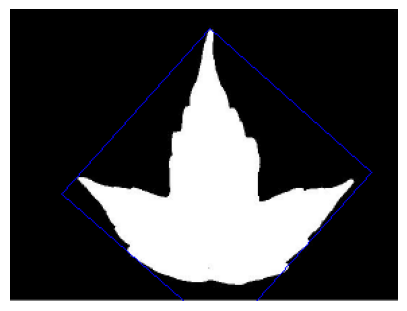

In [23]:
# El rectangulo que tenga la menor area y que encierre nuestro contorno.
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
view(cv.drawContours(im.copy(),[box],0,(0,0,255),1))

In [24]:
rect

((153.79225158691406, 129.5169677734375),
 (161.07772827148438, 164.72378540039062),
 41.6661491394043)

# Enclosing circle

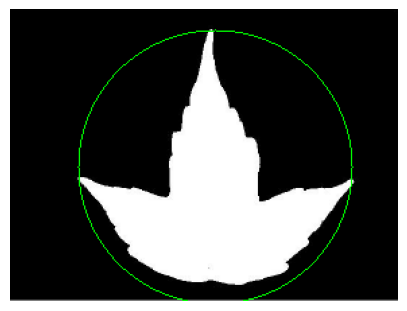

In [25]:
# El circulo que tenga la menor area y que encierre nuestro contorno.
(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
view(cv.circle(im.copy(),center,radius,(0,255,0),1))

# Elipse
It returns the rotated rectangle in which the ellipse is inscribed.

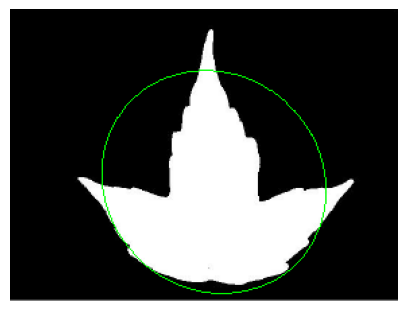

In [26]:
ellipse = cv.fitEllipse(cnt)
view(cv.ellipse(im.copy(),ellipse,(0,255,0),1))

In [27]:
cv.fitEllipse(cnt)

((150.91119384765625, 128.07542419433594),
 (159.59226989746094, 172.29736328125),
 133.1504669189453)

# Aspect Ratio
It is the ratio of width to height of bounding rect of the object.

In [28]:
# Esto nos indica el radio entre los dos rectangulos.
# Si algo está muy cerca de uno significa que su ancho es muy cercano al ancho.
# Si es muy angosto la relación se vuelve distinta. 
x,y,w,h = cv.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio 

1.0789473684210527

# Extent
Extent is the ratio of contour area to bounding rectangle area.

In [29]:

area = cv.contourArea(cnt)
x,y,w,h = cv.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
extent

0.35174582798459564

# Solidity
Solidity is the ratio of contour area to its convex hull area.

In [30]:
area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area)/hull_area
solidity

0.6033070588753358

# Extreme points

In [31]:
#Con esto obtenemos los puntos extremos. 
# el punto más al norte, sur, este y oeste.
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

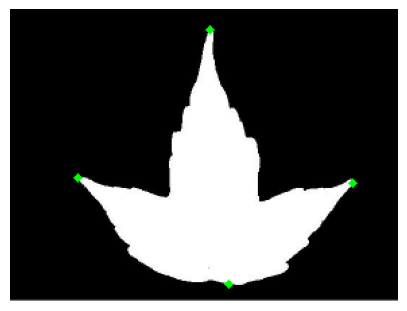

In [32]:
r = im.copy()
for p in [leftmost,rightmost,topmost,bottommost]:
    r = cv.circle(r, p, radius=1, color=(0, 255, 0), thickness=4)
view(r)

# Compare contours

In [33]:
im = cv.imread('rice.png')

imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)
# adaptive Th
imgbin = cv.adaptiveThreshold(imgray, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,127,5)

# compute contours
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(imgbin, mode, method[1])

(256, 256)


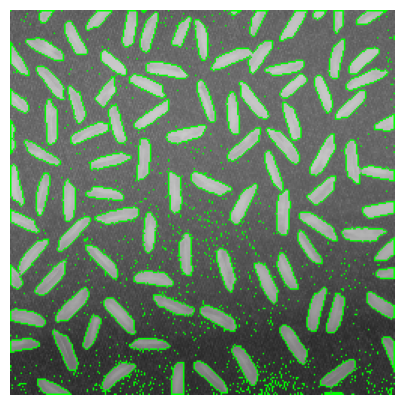

In [34]:
# draw contours over image
index = -1
color = (0,255,0) #(r,g,b)  #Esto es el color
thickness = 1               #Esto es el grosor
imgcont = cv.drawContours(im.copy(), contours, index, color, thickness)
view(imgcont)

### 1. Cuántos granos de arroz hay

Debido a que en clase se habló de seleccionar únicamente los granos de arroz que estuvieran completos, se utilizó el quantile 0.25 para seleccionar el area.

In [35]:
# Se obtiene el quartil .25 para filtrar los granos de arroz que no están completos.
contrnos_q = []
quantile_25 = 0
for i in contours:
    if (cv.contourArea(i) >= 1):
        contrnos_q.append(cv.contourArea(i))
quantile_25 = np.quantile(contrnos_q, .25)

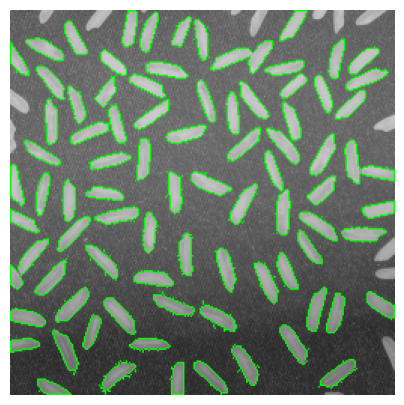

Hay 79 granos de arroz


In [38]:
contornos_reales = [] #Esta variable almacena los granos de arroz que tienen un area por encima de 121.5
contador_granos = 0 #Esta variable cuenta el total de granos de arroz
index =  -1 # Este indice sirve para que se tomen en cuenta todos los contornos. 
color = (0,255,0) # RGB para pintar los contornos. 
thickness = 1 #Grosor del contorno.
r = im.copy() #Se realiza una copia de la imagen original
for c in range(len(contours)): #Se recorren los contornos
    if(cv.contourArea(contours[c]) >= quantile_25): #Se filtran los contronos que tengan un area mayor al quantil 0.25
        r = cv.drawContours(r, contours, c, color, thickness) #Aqui se van a dibujar los contrnos de los granos de arroz que estan por arriba del quantile 0.25
        contornos_reales.append(contours[c]) #Se obtienen unicamente los contornos que están arriba del quantile 0.25
        contador_granos = contador_granos + 1 #Se cuenta el total de granos de arroz. 
view(r)
print("Hay " + str(contador_granos) + " granos de arroz")

### 2. Cual es son los granos más similares?

Se utilizan dos parametros distintos para comparar cual da un mejor resultado a la hora de comprar.

In [45]:
import math
contornos_similares1 = []
similitud1 = math.inf
contornos_similares2 = []
similitud2 = math.inf
#Se comparan todos los granos
for i in range(len(contornos_reales)):
    for j in range(i +1, len(contornos_reales)):
        resultado1 = (cv.matchShapes(contornos_reales[i],contornos_reales[j],1,0.0)) #Se utiliza el parametro 1 que fue el que se vio en clase.
        resultado2 = (cv.matchShapes(contornos_reales[i],contornos_reales[j],2,0.0)) #Se utiliza el parametro 2 porque es mejor con figuras que están rotadas.
        if(resultado1 < similitud1):
            similitud1 = resultado1
            contornos_similares1 = [contornos_reales[i], contornos_reales[j]]
        if(resultado2 < similitud2):
            similitud2 = resultado2
            contornos_similares2 = [contornos_reales[i], contornos_reales[j]]

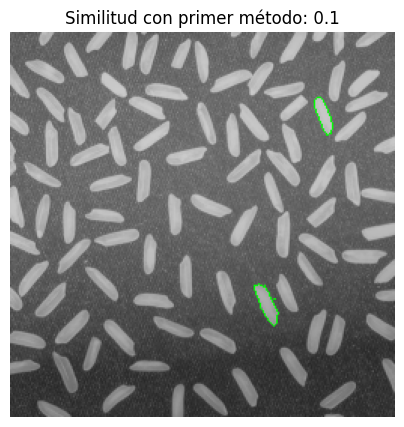

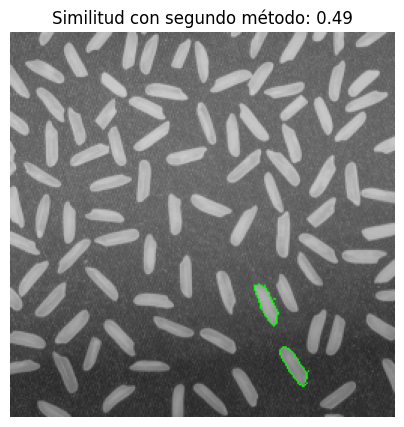

In [49]:
index =  -1 
color = (0,255,0) 
thickness = 1
r1 = im.copy() 
r2 = im.copy() 
for c in range(len(contornos_similares1)): 
        r1 = cv.drawContours(r1, contornos_similares1, c, color, thickness)
for c in range(len(contornos_similares2)): 
        r2 = cv.drawContours(r2, contornos_similares2, c, color, thickness)
view(r1, "Similitud con primer método: " + str(round(resultado1,2)))
view(r2, "Similitud con segundo método: " + str(round(resultado2,2)))

### 3. Cual es la orientacion de cada arroz?

Con la segunda cela se pueden probar diferentes indices de granos de arroz para ver la rotación.

In [52]:
#90 - angulo <- esto es para angulos que son menores a 90
#180 - angulo + 90   <- esto es para angulos que se pasan de 90
rotacion_arroz = {}
for i in range(len(contornos_reales)):
    angulo = cv.fitEllipse(contornos_reales[i])[2]
    if(angulo < 90):
        rotacion_arroz[i] = {round(90-angulo,2): contornos_reales[i]}
    else:
        rotacion_arroz[i] = {round(180-angulo+90,2): contornos_reales[i]}

indices = []
angulos = []
for key, value in rotacion_arroz.items():
    indices.append(key)
    angulos.append(list(value.keys())[0])

df = pd.DataFrame({'indice': indices, 'angulo': angulos})
df

,indice,angulo
0,0,151.41
1,1,85.97
2,2,135.89
3,3,39.60
4,4,36.01
...,...,...
74,74,98.73
75,75,66.63
76,76,74.96
77,77,56.37


In [53]:
import matplotlib.pyplot as plt
import pandas as pd

def view2(img, dataframe, rotacion_arroz, indice):
    k = 10
    index =  606
    color = (0,255,0)
    thickness = 2
    r = im.copy()
    r = cv.drawContours(r, contornos_reales[indice], -1, (255,0,0), thickness)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*k, k))   

    ax1.imshow(r)
    ax1.set_title("El arroz: " + str(indice) + " tiene un angulo de: " + str(list(rotacion_arroz[indice].keys())[0]))
    ax1.axis('off')

    if dataframe is not None:
        ax2.axis('tight')
        ax2.axis('off')
        table_data = dataframe.values.tolist()
        table_headers = dataframe.columns.tolist()
        ax2.table(cellText=table_data, colLabels=table_headers, cellLoc='center', loc='center')
    plt.show()

Esta celda sirve para probar la rotación de un grano de arroz, se modifica el indice en el ultimo parametro.

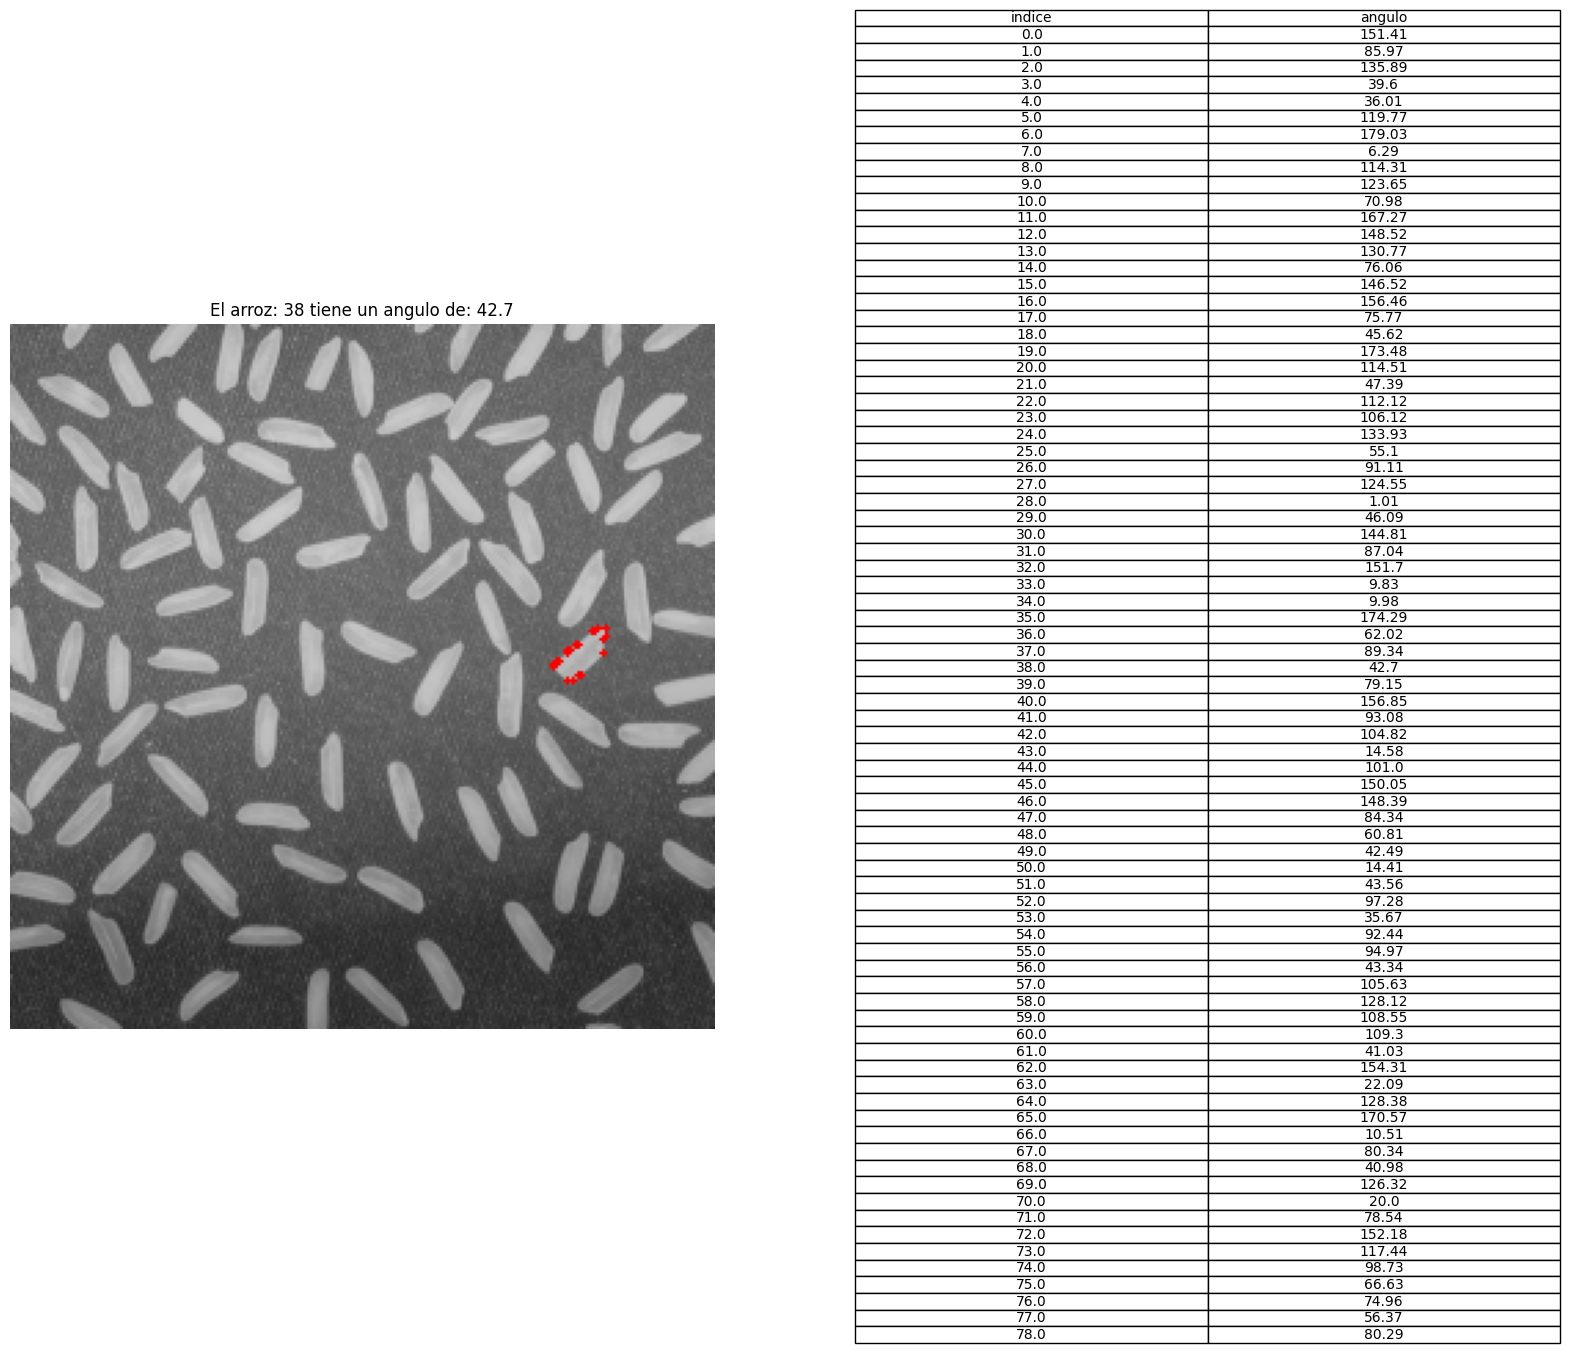

In [57]:
#El ultimo parametro se deberia de cambiar para probar la rotacion en la imagen
view2(imgbin, df, rotacion_arroz, 38)